In [2]:
from openai import OpenAI
import re

client = OpenAI(
    api_key = "c8a7e43e-cce1-4d61-af75-de350b7e5731",
    base_url = "https://ark.cn-beijing.volces.com/api/v3",
)

In [3]:
import argparse
import pdb

from builder import build
from util import DEFAULTS

In [35]:
# print("----- standard request -----")
# completion = client.chat.completions.create(
#     model = "deepseek-r1-250120",  # your model endpoint ID
#     messages = [
#         {
#             "role": "user", 
#             "content": "1+1=?"
#         },
#     ],
# )

In [ ]:
# print("----- Reasoning content -----")
# print(completion.choices[0].message.reasoning_content)

In [37]:
#print("----- Content -----")
#print(completion.choices[0].message.content)

In [1]:
filename = '..\grammar_example.txt'
with open(filename) as file:
        grammer_example = [line for line in file]
grammer_example = ''.join(grammer_example)

In [2]:
quest = '根据文档中的GMBL的语法和示例，使用GMBL语法，生成如下几何图的代码。A circle with center O passes through the vertices A and C of triangle ABC and intersects the segments AB and BC again at distinct points K and N respectively. The circumscribed circles of the triangles ABC and EBN intersect at exactly two distinct points B and M. Prove that angle angle OMB is a right angle.请确保每个点在使用前都已经定义过，确保符合示例的GMBL语法，确保每一句语句都写在同一行，确保GMBL输入的角度是弧度制，确保没有形如(define XXX number xxx)的语句，确保语句中没有使用and或者or。把最终回答放在代码block内。'

In [3]:
messages = [{
    "role": "user", 
    "content": grammer_example + '\n\n' + quest
    }]

In [14]:
input_captions = ['pr1.', 'pr2.']

filename = '..\grammar_example.txt'
with open(filename) as file:
        grammer_example = [line for line in file]
grammer_example = ''.join(grammer_example)

quest1 = '根据文档中的GMBL的语法和示例，使用GMBL语法，生成如下几何图的代码。'
quest2 = '请确保每个点在使用前都已经定义过，确保符合示例的GMBL语法，确保每一句语句都写在同一行，确保GMBL输入的角度是弧度制，确保没有形如(define XXX number xxx)的语句，确保语句中没有使用and或者or。把最终回答放在代码block内。'

messages_list = [
        [{
    "role": "user", 
    "content": grammer_example + '\n\n' + quest1 + input_caption + quest2
    }] 
    for input_caption in input_captions]

In [41]:
response = client.chat.completions.create(
    # 替换 <Model> 为模型的Model ID
    model="deepseek-r1-250120",
    messages=messages,
    stream=True,
)
reasoning_content = ""
content = ""

for chunk in response:
    if hasattr(chunk.choices[0].delta, 'reasoning_content') and chunk.choices[0].delta.reasoning_content:
        reasoning_content += chunk.choices[0].delta.reasoning_content
        print(chunk.choices[0].delta.reasoning_content, end="")
    else:
        content += chunk.choices[0].delta.content
        print(chunk.choices[0].delta.content, end="")

嗯，用户让我用GMBL语法生成一个几何题的代码。题目是说，圆O以三角形ABC的顶点A和C为中心，通过这两个点，然后与AB和BC再次交于不同的点K和N。三角形ABC和EBN的外接圆在B和M两点相交，证明角OMB是直角。我得先把这个几何结构用GMBL的语法表达出来，确保每个点在使用前都定义好了，还要符合语法规则。

首先，我需要确定如何参数化各个点。可能需要先用param定义三角形ABC，比如(param (A B C) triangle)。然后定义圆O，因为圆O经过A和C，所以可以用circumcircle吗？或者用circ函数？circumcircle是外接圆，但题目中的圆O可能不是ABC的外接圆，而是以O为中心经过A和C，所以可能需要用coa函数，比如(coa O A)，然后O是中心，但需要确定如何定义O的位置。或者可能需要用param来定义O，但题目中O是圆心，所以可能需要通过其他点来定义。

或者，题目说圆O经过A和C，所以应该用circumcircle的话可能需要三个点，但这里可能O是中心，所以可能用coa，即圆心为O，经过A，这样另一个点C也需要在圆上，可能需要assert一下OC等于OA，因为半径相同。或者直接用circ函数，比如(define O point ...)，但可能需要更多的步骤。

不过可能更简单的是，先定义三角形ABC，然后定义圆O为经过A和C的圆，同时圆心是O。这时候可能需要用circ函数，但circ需要三个点，但如果圆心是O，那可能需要不同的方法。或者，题目中的圆O可能以O为中心，经过A和C，所以可以用coa定义，比如(coa O A)，然后C也在圆O上，这可能需要在assert中声明(on-circ C (coa O A))？或者直接定义圆O为经过A和C，并确定O为中心。这可能比较复杂。

或者，考虑用param来定义圆O。例如，param O point，然后定义圆O为以O为中心，经过A，即(define Gamma circle (coa O A))，然后assert(on-circ C Gamma)。这样就能保证C在圆O上。

接下来，圆O与AB和BC再次交于K和N。所以需要找到AB线段上的交点，比如K是AB上的另一个交点，N是BC上的另一个交点。这时候需要用到inter-lc函数，参数是直线AB和圆Gamma，并且使用roo

In [42]:
print(content)
content



```lisp
(param (A B C) triangle)
(param O point)
(define Gamma circle (coa O A))
(assert (on-circ C Gamma))
(define K point (inter-lc (line A B) Gamma (rs-neq A)))
(assert (on-seg K A B))
(define N point (inter-lc (line B C) Gamma (rs-neq C)))
(assert (on-seg N B C))
(define circ1 circle (circumcircle A B C))
(define circ2 circle (circumcircle K B N))
(define M point (inter-cc circ1 circ2 (rs-neq B)))
(eval (perp (line O M) (line M B)))
```


'\n\n```lisp\n(param (A B C) triangle)\n(param O point)\n(define Gamma circle (coa O A))\n(assert (on-circ C Gamma))\n(define K point (inter-lc (line A B) Gamma (rs-neq A)))\n(assert (on-seg K A B))\n(define N point (inter-lc (line B C) Gamma (rs-neq C)))\n(assert (on-seg N B C))\n(define circ1 circle (circumcircle A B C))\n(define circ2 circle (circumcircle K B N))\n(define M point (inter-cc circ1 circ2 (rs-neq B)))\n(eval (perp (line O M) (line M B)))\n```'

In [64]:
try:
    re_find = re.finditer('```', content)
    inds = []
    for ind in re_find:
        inds += [ind.span()]

    lines = content[inds[0][1] : inds[1][0]]
    lines = lines.splitlines()[1:]

    print(lines)
except:
    try:
        re_find = re.finditer('```', reasoning_content)
        inds = []
        for ind in re_find:
            inds += [ind.span()]

        lines = content[inds[0][1] : inds[1][0]]
        lines = lines.splitlines()[1:]

        print(lines)
    except:
        raise RuntimeError("No code block found in the reasoning content or content")

['(param (A B C) triangle)', '(param O point)', '(define Gamma circle (coa O A))', '(assert (on-circ C Gamma))', '(define K point (inter-lc (line A B) Gamma (rs-neq A)))', '(assert (on-seg K A B))', '(define N point (inter-lc (line B C) Gamma (rs-neq C)))', '(assert (on-seg N B C))', '(define circ1 circle (circumcircle A B C))', '(define circ2 circle (circumcircle K B N))', '(define M point (inter-cc circ1 circ2 (rs-neq B)))', '(eval (perp (line O M) (line M B)))']


In [44]:
# Parse arguments
parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

# General arguments
parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
parser.set_defaults(unnamed_objects=True)

# Tensorflow arguments
parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

parser.add_argument('--experiment', dest='experiment', action='store_true')

parser.add_argument("--f", type=str, default='abc.def')


args = parser.parse_args()
args = vars(args)

In [49]:
args['n_tries'] = 10
args['eps'] = 1e-4
args['n_iterations'] = 10000

args['lines'] = lines
lines

['(param (A B C) triangle)',
 '(param O point)',
 '(define Gamma circle (coa O A))',
 '(assert (on-circ C Gamma))',
 '(define K point (inter-lc (line A B) Gamma (rs-neq A)))',
 '(assert (on-seg K A B))',
 '(define N point (inter-lc (line B C) Gamma (rs-neq C)))',
 '(assert (on-seg N B C))',
 '(define circ1 circle (circumcircle A B C))',
 '(define circ2 circle (circumcircle K B N))',
 '(define M point (inter-cc circ1 circ2 (rs-neq B)))',
 '(eval (perp (line O M) (line M B)))']

Processing instructions...:   8%|▊         | 1/12 [00:00<00:01,  5.86it/s]

INPUT INSTRUCTIONS:
sample (A B C) triangle ()
parameterize O coords
define Gamma ((coa O A))
assert (on-circ C Gamma)
define K ((inter-lc (connecting A B) Gamma (root-neq A)))
assert (on-seg K A B)
define N ((inter-lc (connecting B C) Gamma (root-neq C)))
assert (on-seg N B C)
define circ1 ((circumcircle A B C))
define circ2 ((circumcircle K B N))
define M ((inter-cc circ1 circ2 (root-neq B)))
eval (perp (connecting O M) (connecting M B))


Sampling initializations...: 100%|██████████| 10/10 [01:49<00:00, 10.94s/it]


[     0]   0.116844542460 ||   0.100000
======== Print losses ==========
-- Losses --
  on-circ_C_Gamma                                    0.1076437840
  interLC_K                                          0.0000000000
  on-seg_K_A_B_0                                     0.0000000000
  on-seg_K_A_B_1                                     0.0000000000
  on-seg_K_A_B_2                                     0.0000000000
  interLC_N                                          0.0000000000
  on-seg_N_B_C_0                                     0.0000000000
  on-seg_N_B_C_1                                     0.0091931023
  on-seg_N_B_C_2                                     0.0000034804
  interLC_M                                          0.0000000000
  points                                             0.0000022574
  distinct                                           0.0000019183
-- Goals --
  perp_(connecting O M)_(connecting M B)             0.0777487398
-- NDGs --


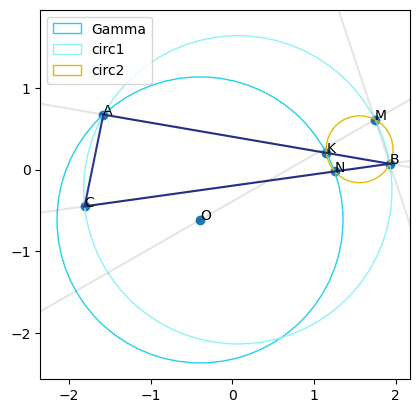

======== Print losses ==========
-- Losses --
  on-circ_C_Gamma                                    0.0000230273
  interLC_K                                          0.0000000000
  on-seg_K_A_B_0                                     0.0000000000
  on-seg_K_A_B_1                                     0.0000000000
  on-seg_K_A_B_2                                     0.0000000000
  interLC_N                                          0.0000000000
  on-seg_N_B_C_0                                     0.0000000000
  on-seg_N_B_C_1                                     0.0000000000
  on-seg_N_B_C_2                                     0.0000000000
  interLC_M                                          0.0000000000
  points                                             0.0000016614
  distinct                                           0.0000000011
-- Goals --
  perp_(connecting O M)_(connecting M B)             0.0000547841
-- NDGs --


Found 1 models


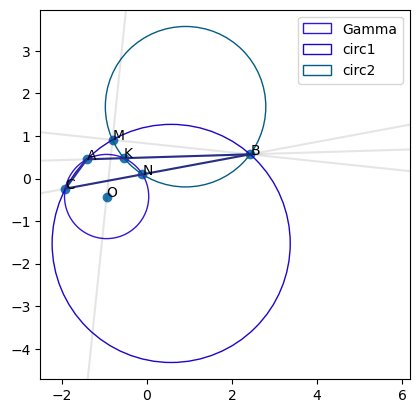

In [65]:
res = build(args)

In [80]:
for item in res[0]:
    print(item)
print('')

print('######################## named_points ########################')
for obj_name, obj in res[1][0].named_points.items():
    print(obj_name)
    print(obj)
    (x, y) = obj
print('')


print('######################## named_lines ########################')
for obj_name, obj in res[1][0].named_lines.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj
    # slope = y/x, intercept = r
print('')


print('######################## named_circles ########################')
for obj_name, obj in res[1][0].named_circles.items():
    print(obj_name)
    print(obj)
    (x, y), r = obj
print('')

print('######################## segments ########################')
for obj in res[1][0][3]:
    print(obj)
print('')

print('######################## seg_colors ########################')
for obj in res[1][0][4]:
    print(obj)
print('')

print('######################## unnamed_points ########################')
for obj in res[1][0][5]:
    print(obj)
print('')

print('######################## unnamed_lines ########################')
for obj in res[1][0][6]:
    print(obj)
print('')

print('######################## unnamed_circles ########################')
for obj in res[1][0][7]:
    print(obj)
print('')

print('######################## ndgs (negative assertions) ########################')
for obj_name, obj in res[1][0].ndgs.items():
    print(obj_name)
    print(obj)
print('')

print('######################## goals ########################')
for obj_name, obj in res[1][0].goals.items():
    print(obj_name)
    print(obj)
print('')

(param (A B C) triangle)
(param O point)
(define Gamma circle (coa O A))
(assert (on-circ C Gamma))
(define K point (inter-lc (line A B) Gamma (rs-neq A)))
(assert (on-seg K A B))
(define N point (inter-lc (line B C) Gamma (rs-neq C)))
(assert (on-seg N B C))
(define circ1 circle (circumcircle A B C))
(define circ2 circle (circumcircle K B N))
(define M point (inter-cc circ1 circ2 (rs-neq B)))
(eval (perp (line O M) (line M B)))

######################## named_points ########################
A
(coords -1.410823 0.451493)
B
(coords 2.424409 0.568514)
C
(coords -1.915197 -0.238256)
O
(coords -0.947944 -0.423137)
K
(coords -0.539250 0.478087)
N
(coords -0.106699 0.097959)
M
(coords -0.810046 0.908911)

######################## named_lines ########################

######################## named_circles ########################
Gamma
CircleNF(center=TfPoint(x=-0.9479441607502552, y=-0.4231365786730189), radius=0.9895626136931899)
circ1
CircleNF(center=TfPoint(x=0.5688984141775706, y=-1.525

In [53]:
import pickle

with open('../llm_gen/res_test.pkl', 'rb') as f:
    result_dict = pickle.load(f)

for res in result_dict.items():
    print(res[1][1].choices[0].message.content)



```GMBL
(param (A B C) (right-tri A))
(assert (cong A B A C))
```


```lisp
(param (A B C D) parallelogram)
(assert (cong A B B C))
```


In [111]:
import json

cnt = 0
with open("C:\qinshenghao\桌面\geometry3k_v2_14k_20240103.jsonl", 'r', encoding='utf-8') as f:
    for line in f:
        data = json.loads(line)
        # for key, value in data.items():
        #     print([key, value])
        print(data['conversations'][0]['value'])
        # content = data['conversations'][1]['value']

        # inds = []
        # re_find = re.finditer('Information in the Image', content)
        # for ind in re_find:
        #     inds += [ind.span()]
        # re_find = re.finditer('Terms and Knowledge Points', content)
        # for ind in re_find:
        #     inds += [ind.span()]


        # lines = content[inds[0][1] : inds[1][0]]
        # lines = ''.join(lines.splitlines()[1:-2])

        # print(lines)

        cnt += 1
        if cnt == 10:
            break

<image>
Find the area of the figure. Round to the nearest hundredth, if necessary.
A. 4
B. 8
C. 16
D. 32
<image>
Find the area of the figure. Round to the nearest hundredth, if necessary.
A. 4
B. 8
C. 16
D. 32
<image>
Find the area of the figure. Round to the nearest hundredth, if necessary.
A. 4
B. 8
C. 16
D. 32
<image>
Find the area of the figure. Round to the nearest hundredth, if necessary.
A. 4
B. 8
C. 16
D. 32
<image>
Find the area of the figure. Round to the nearest hundredth, if necessary.
A. 4
B. 8
C. 16
D. 32
<image>
Find the area of the figure. Round to the nearest hundredth, if necessary.
A. 4
B. 8
C. 16
D. 32
<image>
Find the area of the figure. Round to the nearest hundredth, if necessary.
A. 4
B. 8
C. 16
D. 32
<image>
Find the area of the figure. Round to the nearest hundredth, if necessary.
A. 4
B. 8
C. 16
D. 32
<image>
Find the area of the figure. Round to the nearest hundredth, if necessary.
A. 4
B. 8
C. 16
D. 32
<image>
Find the area of the figure. Round to the neare

In [13]:
import json

cnt = -1
input_captions = []
with open("C:\qinshenghao\桌面\geoqa_v2_99k_20250103.jsonl", 'r', encoding='utf-8') as f:
    for line in f:
        cnt += 1
        data = json.loads(line)
        if cnt == 200:
            break
        if cnt % 20 != 0:
            continue

        content = data['conversations'][1]['value']
        #print(data['conversations'][0]['value'])
        #print(data['conversations'][1]['value'])
        # inds = []
        # re_find = re.finditer('Information in the Image', content)
        # for ind in re_find:
        #     inds += [ind.span()]
        # re_find = re.finditer('Terms and Knowledge Points', content)
        # for ind in re_find:
        #     inds += [ind.span()]

        # inds = []
        # re_find = re.finditer('<image>\n', content)
        # for ind in re_find:
        #     inds += [ind.span()]
        # re_find = re.finditer('\nA', content)
        # for ind in re_find:
        #     inds += [ind.span()]

        
        inds = []
        re_find = re.finditer('## 列出已知信息', content)
        for ind in re_find:
            inds += [ind.span()]
        re_find = re.finditer('## 术语与知识点', content)
        for ind in re_find:
            inds += [ind.span()]

        lines = content[inds[0][1] : inds[1][0]]
        lines = ''.join(lines.splitlines()[:-1])
        lines = ''.join(['\n', lines, '\n'])

        input_captions += [lines]

#input_captions = ['等腰直角三角形ABC，其中A为直角。', '菱形ABCD。']
for item in input_captions:
    print(item)


### 问题文本中的信息1. 图形中bc为半圆的直径。2. D和E是bc上的两个点。3. 连接bd和ce，并延伸交于点a。4. 连接od和oe。5. ∠a的度数为70°。### 图片中的信息1. 半圆的直径bc，直线bc被两点o分成bo和oc两段，o为中央点。2. 点d和点e位于半圆直径的两侧。3. 点a位于半圆外，bd与ce交于点a。4. 点d和点o相连成od。5. 点e和点o相连成oe。6. ∠a标注为70°。7. 通过图形的几何对称性和已知直径的性质，bd和ce将构成一些补角和对角关系，待进一步证明。


### 问题文本中的信息1. AB = 42. BC = 53. AC的垂直平分线交AD于点E### 图片中的信息图片显示一个平行四边形ABCD，且有以下特征：1. 点A, B, C, D按顺时针方向依次排列。2. AB为底边，长度为4。3. BC为侧边，长度为5。4. 线段AC被垂直平分，且中垂线与AD交于点E。图片还给我们一些几何关系的提示：1. E是AC的中垂线上一点，所以AE=EC。2. AC的中垂线意味着BE=DE，这是一个几何性质，并且DE垂直于AC。


回顾你的推理，并识别出问题和图片中可能对解决问题有用的信息。### 问题文本中的信息已知：1. 点C是线段AB的中点。2. 点D是线段BC的中点。3. AB = 20cm。### 图片中的信息图片展示了一条水平线段AB，并标注了三个点A、C、D和B。具体描述如下：1. 点A标在最左端。2. 点B标在最右端。3. 点C位于AB的中点，线段AC与CB相等。4. 点D位于BC的中点，线段BD与DC相等。


### 问题文本中的信息1. AB和Cd是平行线，即AB‖Cd。2. 点E和F处的EF线分别垂直AB和Cd，即EF⊥AB，EF⊥Cd。3. 点M位于直线EM上且∠EM与线Cd有一定关系。4. ∠1的角度给出为55°。### 图片中的信息1. 图中存在四条线：AB，Cd，EF和EM。2. AB和Cd为平行线，AB在线底部，Cd在线顶部。3. EF线形状笔直，垂直于与AB，Cd的交点为F和E。E点EF⊥AB，F点EF⊥Cd均为直角。4. 点M位于Cd上，且在左侧。5. ∠1标注在Cd与EM的交点M处，角度大小标识为55°。6. ∠2标注在E点处，是EF与EM夹角处。


### 问题文本中的信息1

In [8]:
import argparse
import pdb
from builder import build
from util import DEFAULTS
import pickle
import re

def gmb_draw(inputs):
    content, reasoning_content, input_caption = inputs
    try:
        re_find = re.finditer('```', content)
        inds = []
        for ind in re_find:
            inds += [ind.span()]

        lines = content[inds[0][1] : inds[1][0]]
        lines = lines.splitlines()[1:]

        print(lines)
    except:
        try:
            re_find = re.finditer('```', reasoning_content)
            inds = []
            for ind in re_find:
                inds += [ind.span()]

            lines = content[inds[0][1] : inds[1][0]]
            lines = lines.splitlines()[1:]

            print(lines)
        except:
            raise RuntimeError("No code block found in the reasoning content or content")
        
    # Parse arguments
    parser = argparse.ArgumentParser(description='Arguments for building a model that satisfies a set of geometry constraints')

    # General arguments
    parser.add_argument('--problem', '-p', action='store', type=str, help='Name of the file defining the set of constraints')
    parser.add_argument('--dir', '-d', action='store', type=str, help='Directory containing problem files.')
    parser.add_argument('--regularize_points', action='store', dest='regularize_points', type=float, default=DEFAULTS["regularize_points"])
    parser.add_argument('--make_distinct', action='store', dest='make_distinct', type=float, default=DEFAULTS["make_distinct"])
    parser.add_argument('--distinct_prob', action='store', dest='distinct_prob', type=float, default=DEFAULTS["distinct_prob"])
    parser.add_argument('--min_dist', action='store', dest='min_dist', type=float, default=DEFAULTS["min_dist"])
    parser.add_argument('--ndg_loss', action='store', dest='ndg_loss', type=float, default=DEFAULTS["ndg_loss"])

    parser.add_argument('--n_models', action='store', dest='n_models', type=int, default=DEFAULTS['n_models'])
    parser.add_argument('--n_tries', action='store', dest='n_tries', type=int, default=DEFAULTS['n_tries'])
    parser.add_argument('--n_inits', action='store', dest='n_inits', type=int, default=DEFAULTS['n_inits'])
    parser.add_argument('--verbosity', action='store', dest='verbosity', type=int, default=DEFAULTS['verbosity'])
    parser.add_argument('--enforce_goals', dest='enforce_goals', action='store_true')
    parser.add_argument('--plot_freq', action='store', dest='plot_freq', type=int, default=DEFAULTS['plot_freq'])
    parser.add_argument('--loss_freq', action='store', dest='loss_freq', type=int, default=DEFAULTS['loss_freq'])
    parser.add_argument('--losses_freq', action='store', dest='losses_freq', type=int, default=DEFAULTS['losses_freq'])

    parser.add_argument('--unnamed_objects', dest='unnamed_objects', action='store_true')
    parser.add_argument('--no_unnamed_objects', dest='unnamed_objects', action='store_false')
    parser.set_defaults(unnamed_objects=True)

    # Tensorflow arguments
    parser.add_argument('--learning_rate', action='store', dest='learning_rate', type=float, default=DEFAULTS["learning_rate"])
    parser.add_argument('--decay_steps', action='store', dest='decay_steps', type=float, default=DEFAULTS["decay_steps"])
    parser.add_argument('--decay_rate', action='store', dest='decay_rate', type=float, default=DEFAULTS["decay_rate"])
    parser.add_argument('--n_iterations', action='store', dest='n_iterations', type=int, default=DEFAULTS["n_iterations"])
    parser.add_argument('--eps', action='store', dest='eps', type=float, default=DEFAULTS["eps"])

    parser.add_argument('--experiment', dest='experiment', action='store_true')

    parser.add_argument("--f", type=str, default='abc.def')


    args = parser.parse_args()
    args = vars(args)

    args['n_tries'] = 10
    args['eps'] = 5e-5
    args['n_iterations'] = 10000
    args['verbosity'] = -2

    args['lines'] = lines
    
    try:
        res = build(args)
    except:
        res = [lines, [None]]

    return res + [input_caption]

In [11]:
with open('../llm_gen/res_llm_gen.pkl', 'rb') as f:
    llm_result_dict = pickle.load(f)
all_contents_and_reasoning= [[res[1][1].choices[0].message.content, res[1][1].choices[0].message.reasoning_content, res[1][2]] for res in llm_result_dict.items()]

for item in all_contents_and_reasoning:
    print(item[1])

    # res = gmb_draw(item)
    # print(res[2])
    # if res[1] == []:
    #     print('Fail to solve!!!')
    # elif res[1][0] is None:
    #     print('GMBL grammar error!!!')
    # else:
    #     res[1][0].plot()
    #     print(res[1][0])
    # print('')

    #break

好的，我需要根据用户提供的几何题目和图片信息，使用GMBL语法生成对应的代码。首先，我需要理解题目中的各个元素以及它们之间的关系，然后将这些元素逐步转换为GMBL的语句，确保每个对象在使用前都已正确定义，并且符合语法规范。

首先，题目描述中提到，图形中BC是半圆的直径，O是BC的中点，所以BO和OC长度相等。D和E是BC上的两个点，位于半圆直径的两侧。然后连接BD和CE，延伸后交于点A，该点位于半圆外。OD和OE是连接点D、E与O的线段。已知角A的度数为70°，但GMBL中使用弧度制，所以需要转换角度到弧度，即70°乘以π/180，大约是1.2217弧度。

接下来，我需要按照GMBL的语法逐步定义各个点、线、圆等对象，并设置相应的断言和求值条件。首先定义点B和C作为直径的两个端点，然后O是BC的中点。D和E位于BC上，但分处两侧，可能需要使用on-seg参数化，并确保它们位于不同的位置。然后半圆应该是以BC为直径的圆，可以使用diam函数定义。然后定义点D和E在BC上，可能使用param语句，并确保它们位于不同的线段部分。

接下来，连接BD和CE这两条线，使用line函数定义，然后找到它们的交点A，使用inter-ll函数。然后定义OD和OE的线。之后，需要计算角A的度数是否为70°，这里需要注意，在GMBL中uangle函数返回的是弧度，所以需要将70度转换为弧度值，并在eval中使用等于断言。

需要注意的是，每个点在使用前必须已经被定义。例如，B和C可能需要先被定义为点，然后O作为中点。D和E作为BC上的点，可能在param中使用on-seg参数化，并可能使用不同的root-selector来确保它们位于不同的侧边。

另外，题目中提到D和E位于直径的两侧，可能需要用opp-sides或same-side来约束，但根据param的参数化，可能需要使用on-seg或者类似的参数化。例如，D在BO上，E在OC上，或者使用不同的参数化方式确保它们的位置。

可能的步骤：

1. 定义点B和C，作为直径的端点。
2. 定义O为B和C的中点，使用midp函数。
3. 定义半圆Gamma，以BC为直径，使用diam函数。
4. 参数化点D和E在BC线段上，但位于不同的侧边，可能需要用on-seg分别放在BO和OC上，或者使用opp-sides的断言。
5. 定义线B


### 问题文本中的信息1. 图形中bc为半圆的直径。2. D和E是bc上的两个点。3. 连接bd和ce，并延伸交于点a。4. 连接od和oe。5. ∠a的度数为70°。### 图片中的信息1. 半圆的直径bc，直线bc被两点o分成bo和oc两段，o为中央点。2. 点d和点e位于半圆直径的两侧。3. 点a位于半圆外，bd与ce交于点a。4. 点d和点o相连成od。5. 点e和点o相连成oe。6. ∠a标注为70°。7. 通过图形的几何对称性和已知直径的性质，bd和ce将构成一些补角和对角关系，待进一步证明。

['(param B point)', '(param C point)', '(define O point (midp B C))', '(param D point (on-seg B O))', '(param E point (on-seg O C))', '(define BD line (line B D))', '(define CE line (line C E))', '(define A point (inter-ll BD CE))', '(eval (= (uangle B A C) (mul pi (div 70 180))))']


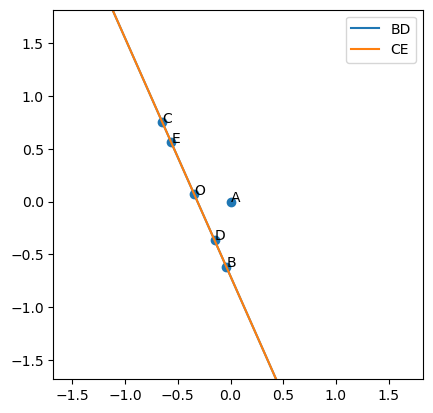

Diagram(named_points={<primitives.Point object at 0x000002B8513480A0>: TfPoint(x=-0.040536049797046836, y=-0.6166775114234837), <primitives.Point object at 0x000002B8500FA340>: TfPoint(x=-0.6458843875721225, y=0.7502341920325732), <primitives.Point object at 0x000002B8501AF370>: TfPoint(x=-0.3432102186845847, y=0.06677834030454477), <primitives.Point object at 0x000002B850211970>: TfPoint(x=-0.15140545333355024, y=-0.3663279592858704), <primitives.Point object at 0x000002B850211730>: TfPoint(x=-0.5621672238811986, y=0.5611959743844235), <primitives.Point object at 0x000002B8513D3F70>: TfPoint(x=-5.551115123125783e-13, y=5.551115123125783e-13)}, named_lines={<primitives.Line object at 0x000002B8513D36A0>: LineNF(n=TfPoint(x=0.9143489621207289, y=0.4049271236515846), r=-0.28677354598173244), <primitives.Line object at 0x000002B8513D3100>: LineNF(n=TfPoint(x=0.914348962120729, y=0.4049271236515846), r=-0.2867735459817325)}, named_circles={}, segments=[], seg_colors=[], unnamed_points=[], 

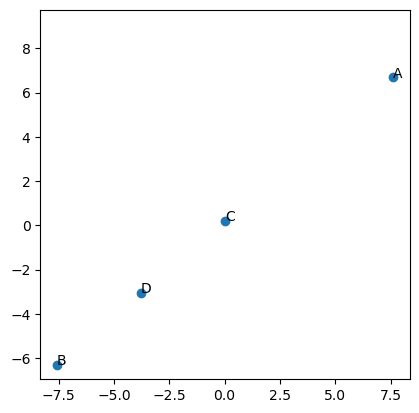

Diagram(named_points={<primitives.Point object at 0x000002B84F88DFA0>: TfPoint(x=7.612417872352257, y=6.693367112673269), <primitives.Point object at 0x000002B85020AF70>: TfPoint(x=-7.580488597113304, y=-6.311172315042805), <primitives.Point object at 0x000002B85020AEE0>: TfPoint(x=0.01596463761947664, y=0.19109739881523202), <primitives.Point object at 0x000002B85020ADF0>: TfPoint(x=-3.7822619797469135, y=-3.0600374581137864)}, named_lines={}, named_circles={}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[], unnamed_circles=[], ndgs={}, goals={})


### 问题文本中的信息1. AB和Cd是平行线，即AB‖Cd。2. 点E和F处的EF线分别垂直AB和Cd，即EF⊥AB，EF⊥Cd。3. 点M位于直线EM上且∠EM与线Cd有一定关系。4. ∠1的角度给出为55°。### 图片中的信息1. 图中存在四条线：AB，Cd，EF和EM。2. AB和Cd为平行线，AB在线底部，Cd在线顶部。3. EF线形状笔直，垂直于与AB，Cd的交点为F和E。E点EF⊥AB，F点EF⊥Cd均为直角。4. 点M位于Cd上，且在左侧。5. ∠1标注在Cd与EM的交点M处，角度大小标识为55°。6. ∠2标注在E点处，是EF与EM夹角处。

['(param A point)', '(param B point)', '(define AB line (line A B))', '(param C point)', '(param D point)', '(define Cd line (line C D))', '(

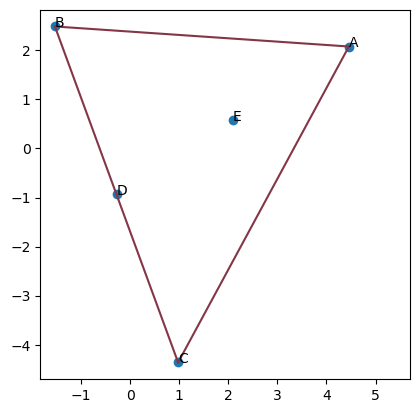

Diagram(named_points={<primitives.Point object at 0x000002B85020A910>: TfPoint(x=4.456656140721844, y=2.077277477300859), <primitives.Point object at 0x000002B85020A760>: TfPoint(x=-1.5346717242719996, y=2.485713134163038), <primitives.Point object at 0x000002B85020AA00>: TfPoint(x=0.9761401022314252, y=-4.362372002207828), <primitives.Point object at 0x000002B85020A9A0>: TfPoint(x=-0.2792658110202872, y=-0.9383294340223951), <primitives.Point object at 0x000002B85020A4C0>: TfPoint(x=2.0886951648507783, y=0.5694740216392319)}, named_lines={}, named_circles={}, segments=[(TfPoint(x=4.456656140721844, y=2.077277477300859), TfPoint(x=-1.5346717242719996, y=2.485713134163038)), (TfPoint(x=-1.5346717242719996, y=2.485713134163038), TfPoint(x=0.9761401022314252, y=-4.362372002207828)), (TfPoint(x=0.9761401022314252, y=-4.362372002207828), TfPoint(x=4.456656140721844, y=2.077277477300859))], seg_colors=[array([0.51957651, 0.21082618, 0.27905169]), array([0.51957651, 0.21082618, 0.27905169]), 

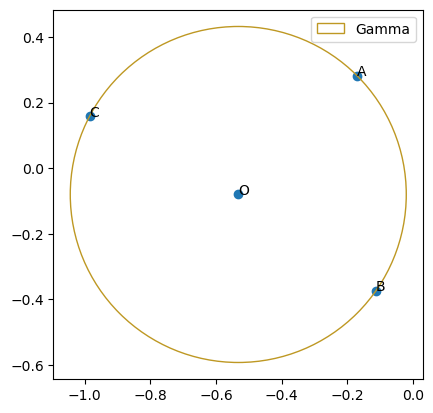

Diagram(named_points={<primitives.Point object at 0x000002B85020A700>: TfPoint(x=-0.5319475718246286, y=-0.08043185913263587), <primitives.Point object at 0x000002B85020A730>: TfPoint(x=-0.1700215725462219, y=0.28225840351822507), <primitives.Point object at 0x000002B85020A400>: TfPoint(x=-0.1118040570582104, y=-0.373713434713415), <primitives.Point object at 0x000002B85020A460>: TfPoint(x=-0.9855662968906522, y=0.15782159382219335)}, named_lines={}, named_circles={<primitives.Circle object at 0x000002B85020A0A0>: CircleNF(center=TfPoint(x=-0.5319475718246286, y=-0.08043185913263587), radius=0.5123813575603856)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[], unnamed_circles=[], ndgs={}, goals={'eq-n_(uangle A C B)_(div (mul 40.0 3.141592653589793) 180.0)': 3.877973036969035e-08})


回顾你的推理，并识别出问题和图片中可能对解决问题有用的信息。### 问题文本中的信息列出问题中提供的已知条件和材料。1. 四边形ABCD内接于圆⊙O。2. 给定∠A=50°。3. 点E在BC的延长线上。### 图片中的信息请详细描述图片中所有已知信息。所有信息需要准确表达，不遗漏任何信息。包括所有可见数据、标签、数值、关系、图表或符号。避免模糊，确保没有图片的人也能完全理解

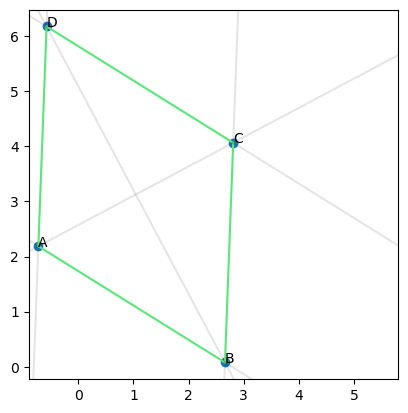

Diagram(named_points={<primitives.Point object at 0x000002B85020A100>: TfPoint(x=-0.7248700924882927, y=2.1863803124041494), <primitives.Point object at 0x000002B85020A130>: TfPoint(x=2.658629211006606, y=0.07878435783238956), <primitives.Point object at 0x000002B8513C2A90>: TfPoint(x=2.8077906990744594, y=4.062263671884708), <primitives.Point object at 0x000002B8513C25B0>: TfPoint(x=-0.5756676300565848, y=6.169993905704842)}, named_lines={}, named_circles={}, segments=[(TfPoint(x=-0.7248700924882927, y=2.1863803124041494), TfPoint(x=2.658629211006606, y=0.07878435783238956)), (TfPoint(x=2.658629211006606, y=0.07878435783238956), TfPoint(x=2.8077906990744594, y=4.062263671884708)), (TfPoint(x=2.8077906990744594, y=4.062263671884708), TfPoint(x=-0.5756676300565848, y=6.169993905704842)), (TfPoint(x=-0.5756676300565848, y=6.169993905704842), TfPoint(x=-0.7248700924882927, y=2.1863803124041494))], seg_colors=[array([0.40523478, 0.9985268 , 0.54102934]), array([0.40523478, 0.9985268 , 0.54

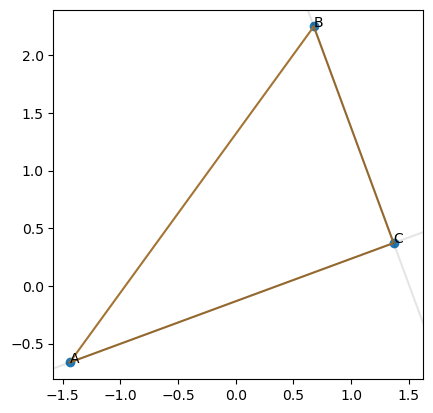

Diagram(named_points={<primitives.Point object at 0x000002B8502169A0>: TfPoint(x=-1.4400458821436066, y=-0.6641018972554287), <primitives.Point object at 0x000002B850216A60>: TfPoint(x=0.6773551651410282, y=2.249729040850417), <primitives.Point object at 0x000002B850216700>: TfPoint(x=1.3692351785735961, y=0.3716862867700851)}, named_lines={}, named_circles={}, segments=[(TfPoint(x=-1.4400458821436066, y=-0.6641018972554287), TfPoint(x=0.6773551651410282, y=2.249729040850417)), (TfPoint(x=0.6773551651410282, y=2.249729040850417), TfPoint(x=1.3692351785735961, y=0.3716862867700851)), (TfPoint(x=1.3692351785735961, y=0.3716862867700851), TfPoint(x=-1.4400458821436066, y=-0.6641018972554287))], seg_colors=[array([0.63903296, 0.45648465, 0.20580828]), array([0.63903296, 0.45648465, 0.20580828]), array([0.63903296, 0.45648465, 0.20580828])], unnamed_points=[], unnamed_lines=[LineNF(n=TfPoint(x=-0.3459376334088207, y=0.9382575093179402), r=-0.12493252758332019), LineNF(n=TfPoint(x=0.93834805

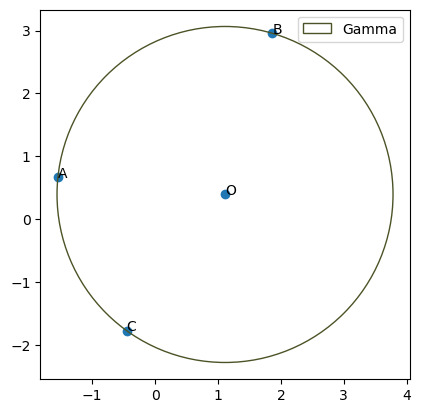

Diagram(named_points={<primitives.Point object at 0x000002B850216580>: TfPoint(x=1.1111041998890823, y=0.394842391854921), <primitives.Point object at 0x000002B850216160>: TfPoint(x=-1.545396753016782, y=0.6663819571181117), <primitives.Point object at 0x000002B850216970>: TfPoint(x=1.863747705938017, y=2.9569233431707564), <primitives.Point object at 0x000002B850216100>: TfPoint(x=-0.4546788162497646, y=-1.7682698555017025)}, named_lines={}, named_circles={<primitives.Circle object at 0x000002B85179FD60>: CircleNF(center=TfPoint(x=1.1111041998890823, y=0.394842391854921), radius=2.670342870923711)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[], unnamed_circles=[], ndgs={}, goals={})


### 问题文本中的信息1. 圆的圆心为O。2. 点A、B、C是圆上的点。3. 连接了OA、OB、AC和BC这些线段。4. 已知∠CAO=20°。5. 已知∠CBO=50°。### 图片中的信息1. 一个圆，圆心标记为O。2. 点A、B、C在圆上，分别位于不同的位置，A在底部，B在底部偏右，C在顶部。3. 从圆心O连接到了A和B，通过线段OA和OB。4. 从A连接到了C，通过线段AC。5. 从C连接到了B，通过线段CB。6. 在图片中可以看到角度的分布：   - ∠CAO位于A、O、C所形成的角上，角度为20°。   - ∠CBO位于B、O、C所形成的角上，角度为5

In [12]:
import pickle

with open('../llm_gen/res_gmb_draw.pkl', 'rb') as f:
    gmb_result_dict = pickle.load(f)

for key, res in gmb_result_dict.items():
    print(res[2])
    print(res[0])
    if res[1] == []:
        print('Fail to solve!!!')
    elif res[1][0] is None:
        print('GMBL grammar error!!!')
    else:
        res[1][0].plot()
        print(res[1][0])
    
    print('')
    


### 问题文本中的信息1. 图形中bc为半圆的直径。2. D和E是bc上的两个点。3. 连接bd和ce，并延伸交于点a。4. 连接od和oe。5. ∠a的度数为70°。### 图片中的信息1. 半圆的直径bc，直线bc被两点o分成bo和oc两段，o为中央点。2. 点d和点e位于半圆直径的两侧。3. 点a位于半圆外，bd与ce交于点a。4. 点d和点o相连成od。5. 点e和点o相连成oe。6. ∠a标注为70°。7. 通过图形的几何对称性和已知直径的性质，bd和ce将构成一些补角和对角关系，待进一步证明。

['(param B point)', '(param C point)', '(define O point (midp B C))', '(param D point (on-seg B O))', '(param E point (on-seg O C))', '(define lineBD line (line B D))', '(define lineCE line (line C E))', '(define A point (inter-ll lineBD lineCE))', '(assert (= (uangle B A C) (div (mul 70 pi) 180)))']


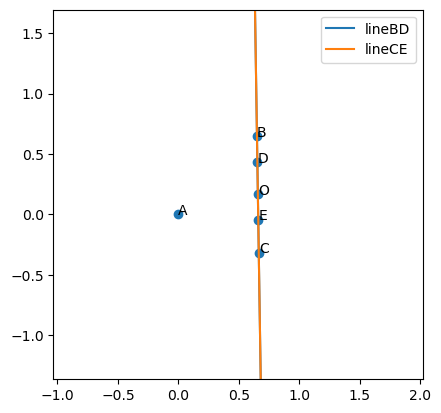

Diagram(named_points={<primitives.Point object at 0x0000020F021A6C70>: TfPoint(x=0.6505179333781622, y=0.6465854854159587), <primitives.Point object at 0x0000020F0219A550>: TfPoint(x=0.6653854747024176, y=-0.31537995943449626), <primitives.Point object at 0x0000020F02194DF0>: TfPoint(x=0.6579517040402899, y=0.16560276299073123), <primitives.Point object at 0x0000020F021BFAC0>: TfPoint(x=0.6538450327960751, y=0.43131420405131826), <primitives.Point object at 0x0000020F021BF220>: TfPoint(x=0.6611823758837773, y=-0.04342942392614882), <primitives.Point object at 0x0000020F0E4AAAC0>: TfPoint(x=4.683753385137379e-13, y=2.220446049250313e-12)}, named_lines={<primitives.Line object at 0x0000020F0E4AADF0>: LineNF(n=TfPoint(x=0.999880587009903, y=0.015453534247273998), r=0.6604322840292915), <primitives.Line object at 0x0000020F0E47E910>: LineNF(n=TfPoint(x=0.999880587009903, y=0.015453534247273927), r=0.6604322840292914)}, named_circles={}, segments=[], seg_colors=[], unnamed_points=[], unname

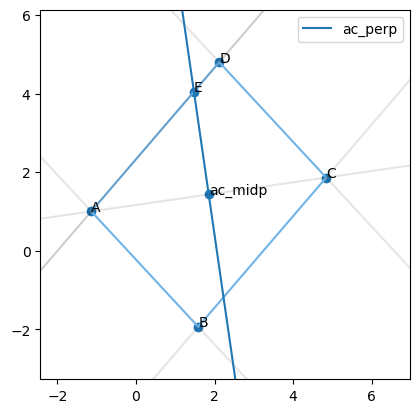

Diagram(named_points={<primitives.Point object at 0x0000020F0E4C6EB0>: TfPoint(x=-1.1357073406709504, y=1.0043787422306842), <primitives.Point object at 0x0000020F0E4C6CD0>: TfPoint(x=1.5843508814907128, y=-1.9298917182610442), <primitives.Point object at 0x0000020F0E4C6C40>: TfPoint(x=4.839362070511498, y=1.8643670612666166), <primitives.Point object at 0x0000020F0E4C69D0>: TfPoint(x=2.1192885090431735, y=4.798604601563353), <primitives.Point object at 0x0000020F0E4C6C70>: TfPoint(x=1.851827364920274, y=1.4343729017486504), <primitives.Point object at 0x0000020F0E4C6A90>: TfPoint(x=1.4756077425363816, y=4.048290216477534)}, named_lines={<primitives.Line object at 0x0000020F0E4C6970>: LineNF(n=TfPoint(x=0.989800358576022, y=0.1424613988516834), r=2.037282159877038)}, named_circles={}, segments=[(TfPoint(x=-1.1357073406709504, y=1.0043787422306842), TfPoint(x=1.5843508814907128, y=-1.9298917182610442)), (TfPoint(x=1.5843508814907128, y=-1.9298917182610442), TfPoint(x=4.839362070511498, 

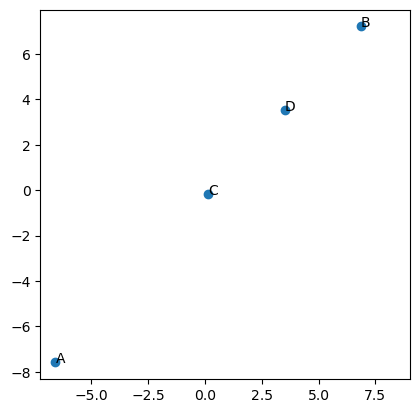

Diagram(named_points={<primitives.Point object at 0x0000020F0E4C6760>: TfPoint(x=-6.58497628886993, y=-7.5920512519682575), <primitives.Point object at 0x0000020F0E4C64C0>: TfPoint(x=6.864828841773988, y=7.207881082915402), <primitives.Point object at 0x0000020F0E4C66A0>: TfPoint(x=0.13992627645202926, y=-0.1920850845264277), <primitives.Point object at 0x0000020F0E4C6520>: TfPoint(x=3.502377559113009, y=3.507897999194487)}, named_lines={}, named_circles={}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[], unnamed_circles=[], ndgs={}, goals={})


### 问题文本中的信息1. AB和Cd是平行线，即AB‖Cd。2. 点E和F处的EF线分别垂直AB和Cd，即EF⊥AB，EF⊥Cd。3. 点M位于直线EM上且∠EM与线Cd有一定关系。4. ∠1的角度给出为55°。### 图片中的信息1. 图中存在四条线：AB，Cd，EF和EM。2. AB和Cd为平行线，AB在线底部，Cd在线顶部。3. EF线形状笔直，垂直于与AB，Cd的交点为F和E。E点EF⊥AB，F点EF⊥Cd均为直角。4. 点M位于Cd上，且在左侧。5. ∠1标注在Cd与EM的交点M处，角度大小标识为55°。6. ∠2标注在E点处，是EF与EM夹角处。

['(param A point)', '(param B point)', '(param C point)', '(param D point)', '(define AB line (line A B))', '(define CD line (line C D))', '(asse

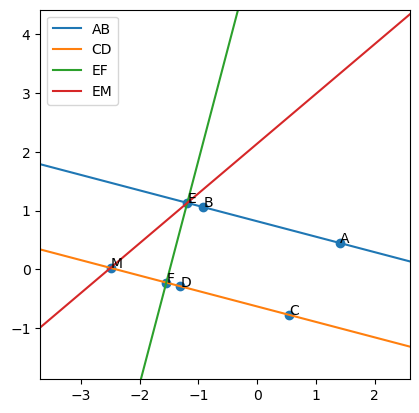

Diagram(named_points={<primitives.Point object at 0x0000020F0E4C63A0>: TfPoint(x=1.3987339919178365, y=0.4495488121163169), <primitives.Point object at 0x0000020F0E4C6DF0>: TfPoint(x=-0.9146118458598438, y=1.0577973519793409), <primitives.Point object at 0x0000020F0E45E1F0>: TfPoint(x=0.5402486485901425, y=-0.7727580439059736), <primitives.Point object at 0x0000020F0E3E3DF0>: TfPoint(x=-1.3095586178156657, y=-0.2863793491512223), <primitives.Point object at 0x0000020F0E4B6400>: TfPoint(x=-1.189091299129668, y=1.1299662961758359), <primitives.Point object at 0x0000020F0E4B6220>: TfPoint(x=-1.5452064103383918, y=-0.2244193450845618), <primitives.Point object at 0x0000020F0E4B6250>: TfPoint(x=-2.493343020852458, y=0.024878760424046353)}, named_lines={<primitives.Line object at 0x0000020F0E4B61F0>: LineNF(n=TfPoint(x=0.25428736762847487, y=0.9671287063594901), r=0.7904519459247541), <primitives.Line object at 0x0000020F0E4A4CD0>: LineNF(n=TfPoint(x=0.2542915024808522, y=0.9671276191723772)

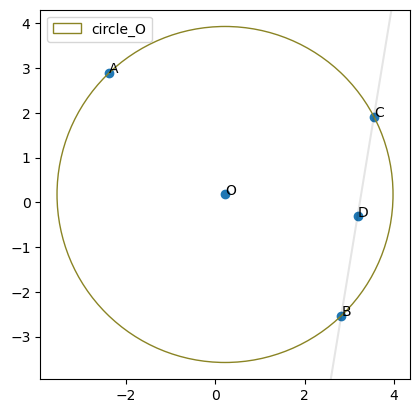

Diagram(named_points={<primitives.Point object at 0x0000020F0E4931C0>: TfPoint(x=-2.3725182392728787, y=2.88480828887569), <primitives.Point object at 0x0000020F0E493A30>: TfPoint(x=2.8165529004101693, y=-2.536553636165465), <primitives.Point object at 0x0000020F0E4939A0>: TfPoint(x=0.22201733056864525, y=0.17412732635511263), <primitives.Point object at 0x0000020F0E4937F0>: TfPoint(x=3.5469683533781184, y=1.9131232434471004), <primitives.Point object at 0x0000020F0E493AC0>: TfPoint(x=3.181760626894144, y=-0.31171519635918266)}, named_lines={}, named_circles={<primitives.Circle object at 0x0000020F0E493DF0>: CircleNF(center=TfPoint(x=0.22201733056864525, y=0.17412732635511263), radius=3.7522534700822603)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[LineNF(n=TfPoint(x=-0.9867936475771534, y=0.16198239750471924), r=-3.190233549575157)], unnamed_circles=[], ndgs={}, goals={})


回顾你的推理，并识别出问题和图片中可能对解决问题有用的信息。### 问题文本中的信息列出问题中提供的已知条件和材料。1. 圆⊙O的直径是线段AB。2. 点S在直径AB的延长线上。3. 直

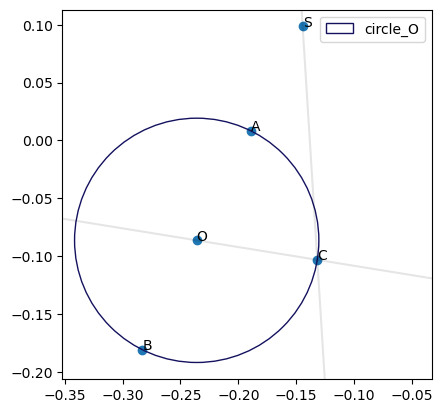

Diagram(named_points={<primitives.Point object at 0x0000020F0E4CEEB0>: TfPoint(x=-0.18912523656466043, y=0.008280569290049333), <primitives.Point object at 0x0000020F0E4CEEE0>: TfPoint(x=-0.2827884388801233, y=-0.18077548127339765), <primitives.Point object at 0x0000020F0E4CEDC0>: TfPoint(x=-0.23595683772239184, y=-0.08624745599167416), <primitives.Point object at 0x0000020F0E4CEE80>: TfPoint(x=-0.14445101506954003, y=0.0984539956631702), <primitives.Point object at 0x0000020F0E4CED60>: TfPoint(x=-0.13181726788499898, y=-0.10309074619109054)}, named_lines={}, named_circles={<primitives.Circle object at 0x0000020F0E4CEC10>: CircleNF(center=TfPoint(x=-0.23595683772239184, y=-0.08624745599167416), radius=0.1054928738382787)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[LineNF(n=TfPoint(x=0.15966282447890526, y=0.987171607411507), r=-0.12281457493232198), LineNF(n=TfPoint(x=0.998041092858048, y=0.06256178519442271), r=-0.1380085912162462)], unnamed_circles=[], ndgs={}, go

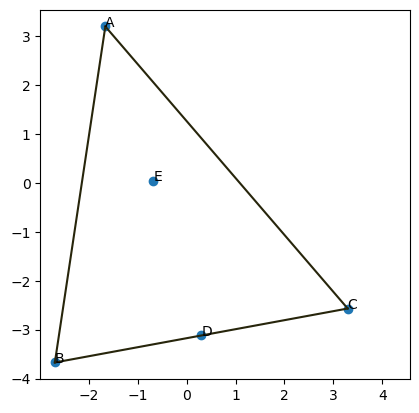

Diagram(named_points={<primitives.Point object at 0x0000020F0E4CE400>: TfPoint(x=-1.6630580819386103, y=3.1982566760989166), <primitives.Point object at 0x0000020F0E4CE3A0>: TfPoint(x=-2.695103923740762, y=-3.6716984539208273), <primitives.Point object at 0x0000020F0E4CE310>: TfPoint(x=3.292162039706314, y=-2.5684669617476237), <primitives.Point object at 0x0000020F0E4CE0A0>: TfPoint(x=0.29852905798277596, y=-3.1200827078342255), <primitives.Point object at 0x0000020F0E4BD1F0>: TfPoint(x=-0.6822645119779172, y=0.03908698413234557)}, named_lines={}, named_circles={}, segments=[(TfPoint(x=-1.6630580819386103, y=3.1982566760989166), TfPoint(x=-2.695103923740762, y=-3.6716984539208273)), (TfPoint(x=-2.695103923740762, y=-3.6716984539208273), TfPoint(x=3.292162039706314, y=-2.5684669617476237)), (TfPoint(x=3.292162039706314, y=-2.5684669617476237), TfPoint(x=-1.6630580819386103, y=3.1982566760989166))], seg_colors=[array([0.15207184, 0.14594493, 0.04260739]), array([0.15207184, 0.14594493, 

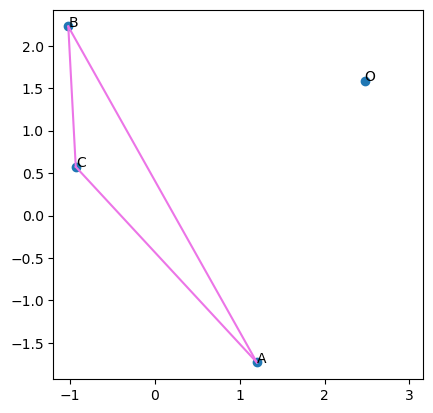

Diagram(named_points={<primitives.Point object at 0x0000020F0E4BD460>: TfPoint(x=1.2028907060479954, y=-1.73101466822852), <primitives.Point object at 0x0000020F0E4BDB50>: TfPoint(x=-1.0190892176273967, y=2.2275407256084527), <primitives.Point object at 0x0000020F0E4BD2B0>: TfPoint(x=-0.9310774612554579, y=0.5740262952011091), <primitives.Point object at 0x0000020F0E4BD4F0>: TfPoint(x=2.47204576363645, y=1.584264150926298)}, named_lines={}, named_circles={}, segments=[(TfPoint(x=1.2028907060479954, y=-1.73101466822852), TfPoint(x=-1.0190892176273967, y=2.2275407256084527)), (TfPoint(x=-1.0190892176273967, y=2.2275407256084527), TfPoint(x=-0.9310774612554579, y=0.5740262952011091)), (TfPoint(x=-0.9310774612554579, y=0.5740262952011091), TfPoint(x=1.2028907060479954, y=-1.73101466822852))], seg_colors=[array([0.92586688, 0.45881231, 0.90777341]), array([0.92586688, 0.45881231, 0.90777341]), array([0.92586688, 0.45881231, 0.90777341])], unnamed_points=[], unnamed_lines=[], unnamed_circles

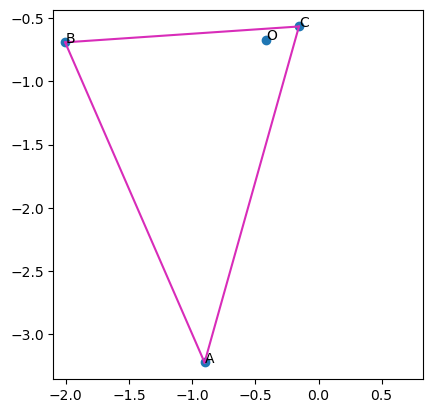

Diagram(named_points={<primitives.Point object at 0x0000020F0E4BDDC0>: TfPoint(x=-0.9019685356319461, y=-3.224745951640515), <primitives.Point object at 0x0000020F0E4BD8E0>: TfPoint(x=-2.005377472504845, y=-0.6908108502993685), <primitives.Point object at 0x0000020F0E4BD9A0>: TfPoint(x=-0.1547525186556716, y=-0.5651343301675115), <primitives.Point object at 0x0000020F0E4BDD90>: TfPoint(x=-0.4119644879775752, y=-0.6717392789058084)}, named_lines={}, named_circles={}, segments=[(TfPoint(x=-0.9019685356319461, y=-3.224745951640515), TfPoint(x=-2.005377472504845, y=-0.6908108502993685)), (TfPoint(x=-2.005377472504845, y=-0.6908108502993685), TfPoint(x=-0.1547525186556716, y=-0.5651343301675115)), (TfPoint(x=-0.1547525186556716, y=-0.5651343301675115), TfPoint(x=-0.9019685356319461, y=-3.224745951640515))], seg_colors=[array([0.84700692, 0.17093726, 0.72736804]), array([0.84700692, 0.17093726, 0.72736804]), array([0.84700692, 0.17093726, 0.72736804])], unnamed_points=[], unnamed_lines=[], u

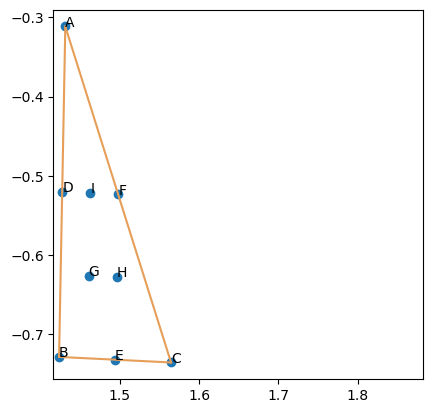

Diagram(named_points={<primitives.Point object at 0x0000020F02166C40>: TfPoint(x=1.430989333470093, y=-0.31146253995085876), <primitives.Point object at 0x0000020F0E4BDF70>: TfPoint(x=1.4231159308361756, y=-0.7284938455511404), <primitives.Point object at 0x0000020F0E4BDDF0>: TfPoint(x=1.564415334347268, y=-0.7355150854010235), <primitives.Point object at 0x0000020F0E4BDA90>: TfPoint(x=1.4270526321531343, y=-0.5199781927509995), <primitives.Point object at 0x0000020F0E4D1760>: TfPoint(x=1.493765632591722, y=-0.732004465476082), <primitives.Point object at 0x0000020F0E4D17F0>: TfPoint(x=1.4977023339086806, y=-0.5234888126759412), <primitives.Point object at 0x0000020F0E4D1850>: TfPoint(x=1.460409132372428, y=-0.6259913291135408), <primitives.Point object at 0x0000020F0E4D1730>: TfPoint(x=1.4957339832502012, y=-0.6277466390760116), <primitives.Point object at 0x0000020F0E4D10A0>: TfPoint(x=1.4623774830309073, y=-0.5217335027134704)}, named_lines={}, named_circles={}, segments=[(TfPoint(x

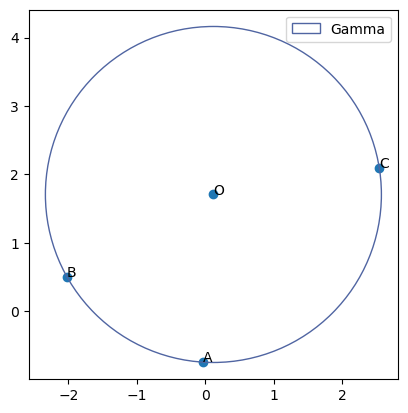

Diagram(named_points={<primitives.Point object at 0x0000020F0E4D1C40>: TfPoint(x=0.11766249622008662, y=1.7062392838716207), <primitives.Point object at 0x0000020F0E4D1CD0>: TfPoint(x=-0.04113221505919852, y=-0.7435703561638348), <primitives.Point object at 0x0000020F0E4D1E80>: TfPoint(x=-2.021461443724998, y=0.5016929782881709), <primitives.Point object at 0x0000020F0E4D1F70>: TfPoint(x=2.542061088107287, y=2.0923409549328564)}, named_lines={}, named_circles={<primitives.Circle object at 0x0000020F0E4D1640>: CircleNF(center=TfPoint(x=0.11766249622008662, y=1.7062392838716207), radius=2.4549507190045423)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[], unnamed_circles=[], ndgs={}, goals={'eq-n_(uangle A O C)_1.7802358': 0.0001747576025003179})


### 问题文本中的信息1. △ABC是一个直角三角形。2. ∠ACB = 90°。3. 以B为圆心，BC为半径画弧，交AB于点D。4. ∠ACD = 20°。### 图片中的信息1. 直角三角形ABC，其中点A在顶部，点B在底部右侧，点C在底部左侧。2. AB是斜边，AC和BC分别是两直角边。3. ∠ACB是一个直角（标记为90°）。4. 以B为圆心，BC为半径画弧, 弧交AB于点D。5. 连接CD，∠ACD为20°。图中显示点D在AB上，并且连

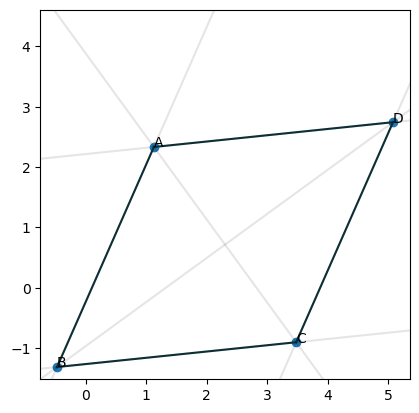

Diagram(named_points={<primitives.Point object at 0x0000020F0E4DF0A0>: TfPoint(x=1.1246211132977701, y=2.332758017430487), <primitives.Point object at 0x0000020F0E4DF160>: TfPoint(x=-0.47914628724982594, y=-1.3104120278717655), <primitives.Point object at 0x0000020F0E4DF220>: TfPoint(x=3.480223065321569, y=-0.9000301702861022), <primitives.Point object at 0x0000020F0E4DF2E0>: TfPoint(x=5.083953422016288, y=2.743205328542859)}, named_lines={}, named_circles={}, segments=[(TfPoint(x=1.1246211132977701, y=2.332758017430487), TfPoint(x=-0.47914628724982594, y=-1.3104120278717655)), (TfPoint(x=-0.47914628724982594, y=-1.3104120278717655), TfPoint(x=3.480223065321569, y=-0.9000301702861022)), (TfPoint(x=3.480223065321569, y=-0.9000301702861022), TfPoint(x=5.083953422016288, y=2.743205328542859)), (TfPoint(x=5.083953422016288, y=2.743205328542859), TfPoint(x=1.1246211132977701, y=2.332758017430487))], seg_colors=[array([0.05473984, 0.20372964, 0.22820867]), array([0.05473984, 0.20372964, 0.22

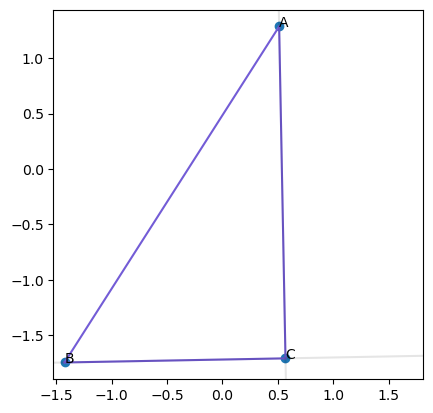

Diagram(named_points={<primitives.Point object at 0x0000020F0E4DF730>: TfPoint(x=0.5117667344246013, y=1.2863258771712271), <primitives.Point object at 0x0000020F0E4DF7F0>: TfPoint(x=-1.4257645771217824, y=-1.746925987632055), <primitives.Point object at 0x0000020F0E4DF8B0>: TfPoint(x=0.569050444268332, y=-1.709748769586668)}, named_lines={}, named_circles={}, segments=[(TfPoint(x=0.5117667344246013, y=1.2863258771712271), TfPoint(x=-1.4257645771217824, y=-1.746925987632055)), (TfPoint(x=-1.4257645771217824, y=-1.746925987632055), TfPoint(x=0.569050444268332, y=-1.709748769586668)), (TfPoint(x=0.569050444268332, y=-1.709748769586668), TfPoint(x=0.5117667344246013, y=1.2863258771712271))], seg_colors=[array([0.45066603, 0.35937222, 0.83992614]), array([0.45066603, 0.35937222, 0.83992614]), array([0.45066603, 0.35937222, 0.83992614])], unnamed_points=[], unnamed_lines=[LineNF(n=TfPoint(x=0.9998172707937741, y=0.01911609328521825), r=0.5362627451586425), LineNF(n=TfPoint(x=-0.018633689266

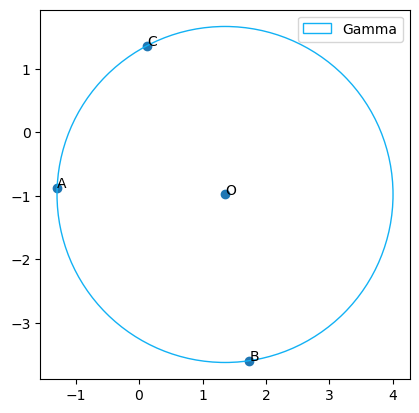

Diagram(named_points={<primitives.Point object at 0x0000020F0E4DFB20>: TfPoint(x=1.3544846491775728, y=-0.9799134522830323), <primitives.Point object at 0x0000020F0E4DFBE0>: TfPoint(x=-1.28990857005983, y=-0.8727192413095173), <primitives.Point object at 0x0000020F0E4DFCA0>: TfPoint(x=0.12904893560595965, y=1.3658515420670456), <primitives.Point object at 0x0000020F0E4DFD60>: TfPoint(x=1.7347486086883603, y=-3.5990173864391717)}, named_lines={}, named_circles={<primitives.Circle object at 0x0000020F0E4DFE20>: CircleNF(center=TfPoint(x=1.3544846491775728, y=-0.9799134522830323), radius=2.646564961759864)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[], unnamed_circles=[], ndgs={}, goals={})


### 问题文本中的信息1. 圆的圆心为O。2. 点A、B、C是圆上的点。3. 连接了OA、OB、AC和BC这些线段。4. 已知∠CAO=20°。5. 已知∠CBO=50°。### 图片中的信息1. 一个圆，圆心标记为O。2. 点A、B、C在圆上，分别位于不同的位置，A在底部，B在底部偏右，C在顶部。3. 从圆心O连接到了A和B，通过线段OA和OB。4. 从A连接到了C，通过线段AC。5. 从C连接到了B，通过线段CB。6. 在图片中可以看到角度的分布：   - ∠CAO位于A、O、C所形成的角上，角度为20°。   - ∠CBO位于B、O、C所形成的角上

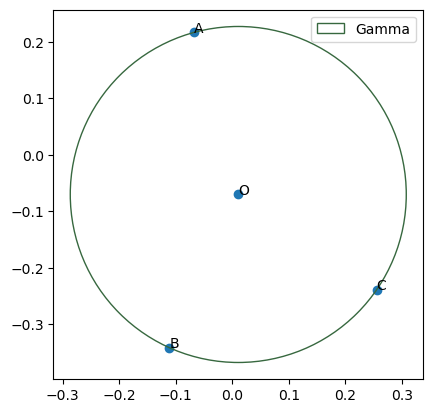

Diagram(named_points={<primitives.Point object at 0x0000020F0E4DFEB0>: TfPoint(x=0.010497077294277452, y=-0.06996038935483943), <primitives.Point object at 0x0000020F0E4DFF70>: TfPoint(x=-0.06764941540479119, y=0.21695373916003113), <primitives.Point object at 0x0000020F0E4E5070>: TfPoint(x=-0.11124816797465222, y=-0.34126222627641545), <primitives.Point object at 0x0000020F0E4E5130>: TfPoint(x=0.255385727471097, y=-0.23864986880506645)}, named_lines={}, named_circles={<primitives.Circle object at 0x0000020F0E4E51F0>: CircleNF(center=TfPoint(x=0.010497077294277452, y=-0.06996038935483943), radius=0.29736608996759073)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[], unnamed_circles=[], ndgs={}, goals={})


回顾推理，并识别问题和图片中可能对解决问题有用的信息：### 问题文本中的信息- AB是⊙O的直径。- C和D是圆O上的点。- ∠BCD=40°。### 图片中的信息- 图片展示了一个圆O，其中AB是直径。- A、B、C、D四个点均在圆周上，且A、B是圆的直径的两端点。- ∠BCD是一个40°的角，其顶点位于点C，角的两条边分别为BC和BD。- 直径AB的中点是圆心O，在图中已经清晰标明。- 圆心O的两个端点A和B形成一条直线，垂直于AD所形成的角即为直角（90°）。- 连接的线段有AC、AD、BC、BD、DC等。### 问题中

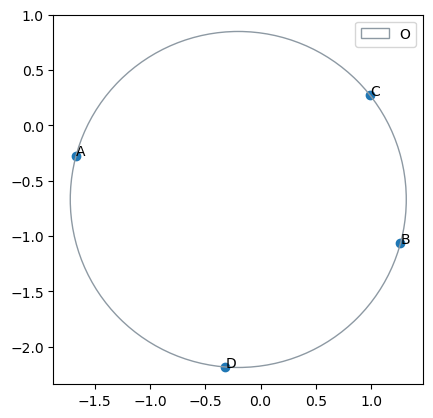

Diagram(named_points={<primitives.Point object at 0x0000020F0E4E5280>: TfPoint(x=-1.6684771295135374, y=-0.27344648428956814), <primitives.Point object at 0x0000020F0E4E5340>: TfPoint(x=1.2636141785838226, y=-1.0676186170385447), <primitives.Point object at 0x0000020F0E4E5400>: TfPoint(x=0.9885310027677258, y=0.2721103187758448), <primitives.Point object at 0x0000020F0E4E54C0>: TfPoint(x=-0.31894573440493684, y=-2.184927357617458)}, named_lines={}, named_circles={<primitives.Circle object at 0x0000020F0E4E5580>: CircleNF(center=TfPoint(x=-0.2024314754648574, y=-0.6705325506640564), radius=1.5188703709875266)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[], unnamed_circles=[], ndgs={}, goals={'eq-n_(uangle A D B)_(div 3.141592653589793 2.0)': 4.930380657631324e-32})


### 问题文本中的信息1. AB是⊙O的直径。2. C是⊙O上的一点。3. OD垂直BC于点D。4. AC的长度为4。5. 需要求出OD的长度。### 图片中的信息图片展示了一个圆，圆心为O，圆的直径为AB，且点A和点B在圆的最左右两端。C点在圆上方。连线AC和BC形成一个三角形，并且从O点引出一条直线OD，垂直于BC，交点为D。圆心O，直径为AB，使AB经过圆心，且O位于AB的中点。AB为直径的特性表

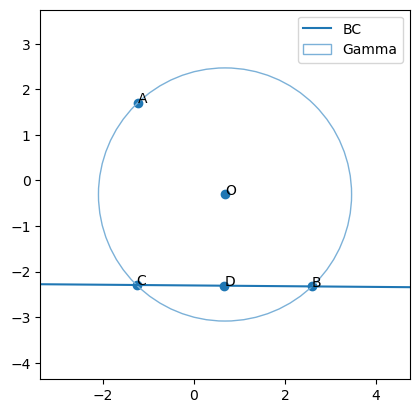

Diagram(named_points={<primitives.Point object at 0x0000020F0E4E56A0>: TfPoint(x=-1.2243164369342134, y=1.709274301118972), <primitives.Point object at 0x0000020F0E4E5760>: TfPoint(x=2.5929371364087728, y=-2.324489305061729), <primitives.Point object at 0x0000020F0E4E5820>: TfPoint(x=0.6843103497372797, y=-0.30760750197137854), <primitives.Point object at 0x0000020F0E4E58E0>: TfPoint(x=-1.2564193875025618, y=-2.2936176996868665), <primitives.Point object at 0x0000020F0E4E59A0>: TfPoint(x=0.668258874453106, y=-2.3090535023742977)}, named_lines={<primitives.Line object at 0x0000020F0E4E5A60>: LineNF(n=TfPoint(x=0.008019681317912804, y=0.9999678418387059), r=-2.303620024248351)}, named_circles={<primitives.Circle object at 0x0000020F0E4E5B50>: CircleNF(center=TfPoint(x=0.6843103497372797, y=-0.30760750197137854), radius=2.7768090352843737)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[], unnamed_circles=[], ndgs={}, goals={'eq-n_(dist O D)_2.0': 2.281203327596644e-06})



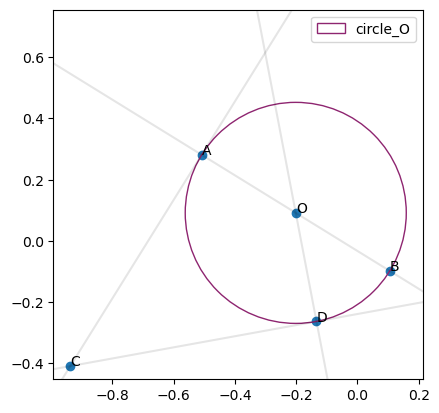

Diagram(named_points={<primitives.Point object at 0x0000020F0E4E5C40>: TfPoint(x=-0.5086308555621547, y=0.2812415668341625), <primitives.Point object at 0x0000020F0E4E5D30>: TfPoint(x=0.10546762188819189, y=-0.09783682457548971), <primitives.Point object at 0x0000020F0E4E5DF0>: TfPoint(x=-0.2015816168369814, y=0.09170237112933641), <primitives.Point object at 0x0000020F0E4E5EB0>: TfPoint(x=-0.1338469329821076, y=-0.2627216042352277), <primitives.Point object at 0x0000020F0E4E5F70>: TfPoint(x=-0.937744102517322, y=-0.4085111217676229)}, named_lines={}, named_circles={<primitives.Circle object at 0x0000020F0E4ED070>: CircleNF(center=TfPoint(x=-0.2015816168369814, y=0.09170237112933641), radius=0.36083838724578743)}, segments=[], seg_colors=[], unnamed_points=[], unnamed_lines=[LineNF(n=TfPoint(x=-0.8490931581228894, y=0.5282431341994877), r=0.5804389061996699), LineNF(n=TfPoint(x=0.5252744785596224, y=0.8509328540924465), r=-0.02785311827912), LineNF(n=TfPoint(x=-0.17844277080925697, y=0

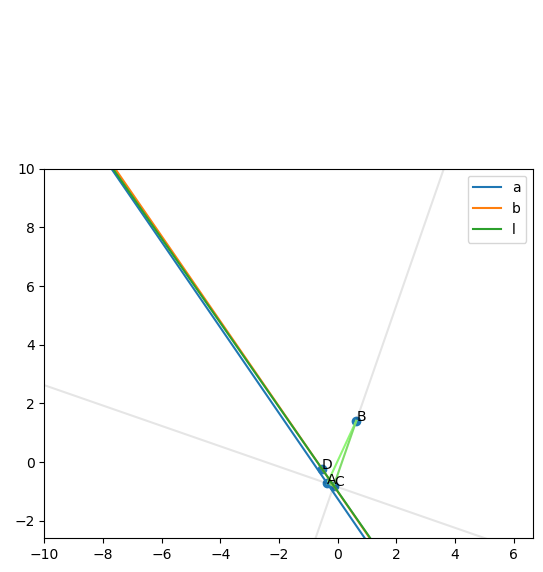

Diagram(named_points={<primitives.Point object at 0x0000020F0E4ED430>: TfPoint(x=-0.3608228518299421, y=-0.7308585840112499), <primitives.Point object at 0x0000020F0E4ED4F0>: TfPoint(x=0.6299930574430218, y=1.4033520217466375), <primitives.Point object at 0x0000020F0E4ED5B0>: TfPoint(x=-0.13787656340824234, y=-0.8082862200692538), <primitives.Point object at 0x0000020F0E4ED670>: TfPoint(x=-0.5387687660811808, y=-0.23265701269474715), <primitives.Point object at 0x0000020F0E4ED730>: TfPoint(x=-11.176078982051466, y=15.041140799759061)}, named_lines={<primitives.Line object at 0x0000020F0E4ED7F0>: LineNF(n=TfPoint(x=0.8247202723166757, y=0.5655408671616122), r=-0.7107590905145165), <primitives.Line object at 0x0000020F0E4ED8E0>: LineNF(n=TfPoint(x=0.8233556737790777, y=0.5675257125944171), r=-0.5756371573275678), <primitives.Line object at 0x0000020F0E4ED9D0>: LineNF(n=TfPoint(x=0.820601350592922, y=0.5715010266001911), r=-0.5750780987042808)}, named_circles={}, segments=[(TfPoint(x=-0.3

In [2]:
import pickle

with open('../llm_gen/res_all_in_one_dict_20250311130550.pkl', 'rb') as f:
    gmb_result_dict = pickle.load(f)

for key, res in gmb_result_dict.items():
    print(res[2])
    print(res[0])
    if res[1] == []:
        print('Fail to solve!!!')
    elif res[1][0] is None:
        print('GMBL grammar error!!!')
    else:
        res[1][0].plot()
        print(res[1][0])
    # print(res[3])
    # print(res[4])
    
    print('')
    

In [19]:
import datetime

time_str = datetime.datetime.now().strftime('%Y%m%d%H%M%S')

'aaa_' + time_str + '.pkl'

'aaa_20250311100502.pkl'